# Recon ML System

## Importing libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier, VotingClassifier, StackingClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import joblib
from sklearn.preprocessing import LabelEncoder

from functions_ml import *
model_repo = ".\\Recon_model\\"
file_path = '.\Files\\Recon\\'

## Preprocessing data for binary classification (Recon or Benign)

### Import basic datasets

In [2]:
train_sets, test_sets = get_train_and_test_files()
print(len(train_sets), len(test_sets))

X_columns = x_columns(read_csv_file(train_sets[0]))
y_column = 'label'

135 34


### Scaling

In [3]:
scaler = get_or_define_and_save_scaler(model_repo, train_sets, X_columns)

### Dictionnary for spliting data

In [4]:
dict_3_classes = {}
dict_3_classes['Recon-PingSweep'] = 'Recon'
dict_3_classes['Recon-OSScan'] = 'Recon'
dict_3_classes['Recon-PortScan'] = 'Recon'
dict_3_classes['VulnerabilityScan'] = 'Recon'
dict_3_classes['Recon-HostDiscovery'] = 'Recon'

dict_3_classes['BenignTraffic'] = 'Benign'

dict_3_classes['DDoS-RSTFINFlood'] = 'Other'
dict_3_classes['DDoS-PSHACK_Flood'] = 'Other'
dict_3_classes['DDoS-SYN_Flood'] = 'Other'
dict_3_classes['DDoS-UDP_Flood'] = 'Other'
dict_3_classes['DDoS-TCP_Flood'] = 'Other'
dict_3_classes['DDoS-ICMP_Flood'] = 'Other'
dict_3_classes['DDoS-SynonymousIP_Flood'] = 'Other'
dict_3_classes['DDoS-ACK_Fragmentation'] = 'Other'
dict_3_classes['DDoS-UDP_Fragmentation'] = 'Other'
dict_3_classes['DDoS-ICMP_Fragmentation'] = 'Other'
dict_3_classes['DDoS-SlowLoris'] = 'Other'
dict_3_classes['DDoS-HTTP_Flood'] = 'Other'
dict_3_classes['DoS-UDP_Flood'] = 'Other'
dict_3_classes['DoS-SYN_Flood'] = 'Other'
dict_3_classes['DoS-TCP_Flood'] = 'Other'
dict_3_classes['DoS-HTTP_Flood'] = 'Other'
dict_3_classes['Mirai-greeth_flood'] = 'Other'
dict_3_classes['Mirai-greip_flood'] = 'Other'
dict_3_classes['Mirai-udpplain'] = 'Other'
dict_3_classes['DNS_Spoofing'] = 'Other'
dict_3_classes['MITM-ArpSpoofing'] = 'Other'
dict_3_classes['BrowserHijacking'] = 'Other'
dict_3_classes['Backdoor_Malware'] = 'Other'
dict_3_classes['XSS'] = 'Other'
dict_3_classes['Uploading_Attack'] = 'Other'
dict_3_classes['SqlInjection'] = 'Other'
dict_3_classes['CommandInjection'] = 'Other'
dict_3_classes['DictionaryBruteForce'] = 'Other'

### Refactoring data

In [5]:
train_sets.extend(test_sets)
refactor_dataframe(train_sets, dict_3_classes, file_path, y_column)

100%|██████████| 168/168 [02:25<00:00,  1.16it/s]


### Counting number of samples per class

5


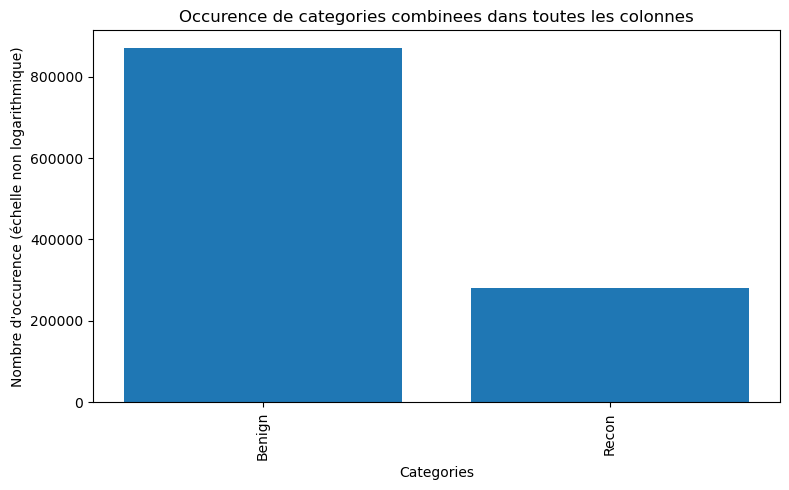

In [4]:
train_sets, test_sets = get_train_and_test_files(path_to_datasets=file_path)
print(len(train_sets) + len(test_sets))

plot_bar_chart(count_label(train_sets, file_path=file_path), 'Occurence de categories combinees dans toutes les colonnes', 'Categories', 'Nombre d\'occurence', 8, 5, log_scale=False)

## Define variables

In [4]:
performance_path = 'performance.csv'
file_path = '.\Files\\Recon\\'
model_path_binary = '.\\Recon_model\\Binary\\'
local_path = '.\\Recon_model\\'
model_path_all_classes = '.\\Recon_model\\All_classes\\'
after_build_csv = 'after_build_set_scaled.csv'

# Get path data
build_sets, after_build_sets = get_train_and_test_files(path_to_datasets=file_path)
print(len(build_sets) + len(after_build_sets))

# Get build datasets
build_nb = round(len(build_sets) * 0.8)
train_sets = build_sets[:build_nb]
# train_sets = train_sets[: round(len(train_sets) * 0.5)]
test_sets = build_sets[build_nb:]
# test_sets = test_sets[: round(len(test_sets) * 0.5)]

# Define different columns
X_columns = x_columns(read_csv_file(train_sets[0], path_to_datasets=file_path))
print(len(X_columns))
X_columns = X_columns[:-1]
y_column = 'label'
z_column = 'Binary'

5
47


## First model (Binary (Recon or Benigh))

### Building model

In [5]:
simpleModelsDef = [
    {
        "Name": "DT",
        "Model": DecisionTreeClassifier(random_state = 42)
    },
    {
        "Name": "RF",
        "Model": RandomForestClassifier(random_state = 42)
    },
    {
        "Name": "ET",
        "Model": ExtraTreesClassifier(random_state = 42)
    },
    {
        "Name": "XGB",
        "Model": XGBClassifier(random_state = 42)
    },
    {
        "Name": "Cat",
        "Model": CatBoostClassifier(random_state = 42, verbose = 0)
    },
    {
        "Name": "LIGHT",
        "Model": LGBMClassifier(random_state = 42, verbose = 0)
    },
    {
        "Name": "GBoost",
        "Model": GradientBoostingClassifier(random_state = 42)
    },
    {
        "Name": "Adaboost",
        "Model": AdaBoostClassifier(random_state = 42)
    },
    {
        "Name": "MLP",
        "Model": MLPClassifier(hidden_layer_sizes = (100,20), max_iter = 300, activation = 'relu', solver = 'adam', random_state = 42)
    },
]

In [ ]:
# Import or define encoder and performance dataframe
encoder = get_or_define_encoder(model_path_binary)
performance = get_or_define_performance_df(model_path_binary, performance_path)

# Buidling models
for model in tqdm(simpleModelsDef):
    # Build model
    performance, encoder = build_model_multifiltered(model['Model'], model['Name'], train_sets, test_sets, file_path, performance, model_path_binary, X_columns=X_columns, y_column=z_column, encoder=encoder, scaler=scaler, confusionMatrix=False)

    # Save performance
    performance.to_csv(model_path_binary + performance_path, index=False)

# Save the encoder to a file
joblib.dump(encoder, model_path_binary+'encoder.joblib')

#### Complex models

In [8]:
complexModelsDitionnary = [
    {
        "Name": "Voting (Cat, XGB, RF)",
        "Model": VotingClassifier([
            ('Cat', CatBoostClassifier(random_state = 42, verbose = 0)),
            ('XGB', XGBClassifier(random_state = 42)),
            ('RF', RandomForestClassifier(random_state = 42)),
            ],
            voting='soft')
    },
    {
        "Name": "Bagging (Cat)",
        "Model": BaggingClassifier(base_estimator=CatBoostClassifier(random_state = 42, verbose = 0), n_estimators=15)
    },
    {
        "Name": "Stacking (Cat, XGB, RF)",
        "Model": StackingClassifier([
            ('XGB', XGBClassifier(random_state = 42)),
            ('RF', RandomForestClassifier(random_state = 42)),
            ],
            final_estimator=CatBoostClassifier(random_state = 42, verbose = 0),
            cv=5)
    },
]

In [9]:
# Import or define encoder and performance dataframe
encoder = get_or_define_encoder(model_path_binary)
performance = get_or_define_performance_df(model_path_binary, performance_path)

# Buidling models
for model in complexModelsDitionnary:
    # Build model
    performance, encoder = build_model_multifiltered(model['Model'], model['Name'], train_sets, test_sets, file_path, performance, model_path_binary + "complex_", X_columns=X_columns, y_column=z_column, encoder=encoder, scaler=scaler, confusionMatrix=False)

    # Save performance
    performance.to_csv(model_path_binary + performance_path, index=False)

# Save the encoder to a file
joblib.dump(encoder, model_path_binary+'encoder.joblib')

100%|██████████| 2/2 [00:00<00:00, 22.75it/s]


['.\\Recon_model\\Binary\\encoder.joblib']

#### Hyperparameters tuning

In [15]:
param_space_decision_tree = {
    'max_depth': (1, 20),
    'min_samples_split': (2, 20),
    'min_samples_leaf': (1, 20),
}

param_space_random_forest = {
    'n_estimators': (10, 200),
    'max_depth': (1, 20),
    'min_samples_split': (2, 20),
    'min_samples_leaf': (1, 20),
    'max_features': (0.1, 1.0),
}

param_space_xgboost = {
    'n_estimators': (10, 200),
    'max_depth': (1, 20),
    'learning_rate': (0.01, 1.0),
}

simpleModelsDef[0]['param_space'] = param_space_decision_tree
simpleModelsDef[1]['param_space'] = param_space_random_forest
simpleModelsDef[2]['param_space'] = param_space_xgboost

In [16]:
model_path = '.\\Recon_model\\Binary\\'
performance_path = 'tuning_performance.csv'

try:
    # Load the encoder from a file
    encoder = joblib.load(model_path+'encoder.joblib')
except:
    # scaler = MinMaxScaler()
    encoder = LabelEncoder()

# Hyperparameters tuning models
for model in tqdm(simpleModelsDef):
    optimize_hyperparameters(model['Model'], model['Name'], file_path, model_path, model['param_space'], train_sets, X_columns, y_column=z_column, encoder=encoder, scaler=scaler, n_splits=5, n_iter=10)


# try:
#     # Load performance dataframe
#     performance = read_csv_file(performance_path, model_path)
# except:
#     # Define performance dataframe
#     performance = pd.DataFrame(columns=['Model', 'Accuracy Training', 'Recall Training', 'Precision Training', 'F1 Training', 'Accuracy Testing', 'Recall Testing', 'Precision Testing', 'F1 Testing', 'FU_rate', 'FL_rate', 'FU', 'FL', 'Total rows'])

# # Buidling models
# for model in tqdm(simpleModelsDef):
#     # Build model
#     performance, encoder = build_model(model['Model'], model['Name'], train_sets, test_sets, file_path, performance, model_path, X_columns=X_columns , y_column=z_column, encoder=encoder, scaler=scaler, confusionMatrix=False)

#     # Save performance
#     performance.to_csv(model_path + performance_path, index=False)

# Save the encoder to a file
joblib.dump(encoder, model_path+'encoder.joblib')

100%|██████████| 3/3 [3:02:20<00:00, 3646.70s/it]  


['.\\Recon_model\\Binary\\encoder.joblib']

#### Feature Importance

In [14]:
# Import encoder and get all features
encoder = get_encoder(model_path_binary, "Please, build models first")

simpleModelsDef = model_dict_refactor_with_load_model(simpleModelsDef, model_path_binary)

# Get feature importance
average_importance_df = calculate_and_plot_feature_importance(simpleModelsDef, train_sets, X_columns, z_column, X_columns, file_path, fitted_models=True, filter_bool=False, scaler=scaler, encoder=encoder)
average_importance_df.to_csv('.\\resultats\\Recon\\Binary\\feature_importance.csv', index=False)
average_importance_df.head(average_importance_df.size)

.\Recon_model\Binary\model_DT.joblib
.\Recon_model\Binary\model_RF.joblib
.\Recon_model\Binary\model_ET.joblib
.\Recon_model\Binary\model_XGB.joblib
[20:17:03] WARNING: D:\bld\xgboost-split_1679035243975\work\src\learner.cc:553: 
  If you are loading a serialized model (like pickle in Python, RDS in R) generated by
  older XGBoost, please export the model by calling `Booster.save_model` from that version
  first, then load it back in current version. See:

    https://xgboost.readthedocs.io/en/latest/tutorials/saving_model.html

  for more details about differences between saving model and serializing.

.\Recon_model\Binary\model_Cat.joblib
.\Recon_model\Binary\model_LIGHT.joblib
.\Recon_model\Binary\model_GBoost.joblib


TypeError: __randomstate_ctor() takes from 0 to 1 positional arguments but 2 were given

#### Display performance

In [12]:
# Preprocessing if necessary
performance = read_csv_file(performance_path, model_path_binary)
performance = performance.drop(9).reset_index(drop=True)
# performance.insert(0, 'Model', [d['Name'] for d in simpleModelsDef])

performance.head()
# performance.to_csv(model_path_binary + performance_path, index=False)

In [13]:
read_csv_file(performance_path, model_path_binary).sort_values(by=['Total rows', 'Accuracy Testing', 'Recall Testing', 'Precision Testing', 'F1 Testing'], ascending=False).head(20)

,Model,Accuracy Training,Recall Training,Precision Training,F1 Training,Accuracy Testing,Recall Testing,Precision Testing,F1 Testing,FU_rate,FL_rate,FU,FL,Total rows
10,Bagging (Cat),0.972063,0.950607,0.973053,0.961193,0.963987,0.938793,0.962457,0.949896,0.009114,0.026900,2749,8114,301637
9,"Voting (Cat, XGB, RF)",0.981404,0.965368,0.984056,0.974282,0.963632,0.937498,0.962793,0.949315,0.008706,0.027662,2626,8344,301637
11,"Stacking (Cat, XGB, RF)",0.983259,0.974228,0.980155,0.977148,0.963075,0.939518,0.959182,0.948840,0.010980,0.025945,3312,7826,301637
4,Cat,0.972429,0.951559,0.973089,0.961737,0.963058,0.938064,0.960590,0.948662,0.009959,0.026983,3004,8139,301637
3,XGB,0.969440,0.947380,0.968971,0.957579,0.962710,0.937391,0.960297,0.948157,0.009989,0.027301,3013,8235,301637
1,RF,0.999978,0.999972,0.999967,0.999970,0.961053,0.932959,0.960175,0.945599,0.009246,0.029701,2789,8959,301637
5,LIGHT,0.962114,0.935232,0.960799,0.947163,0.959879,0.931929,0.957901,0.944027,0.010237,0.029884,3088,9014,301637
2,ET,0.999996,0.999998,0.999993,0.999995,0.953437,0.913954,0.958657,0.933717,0.006813,0.039750,2055,11990,301637
6,GBoost,0.952581,0.921199,0.948193,0.933712,0.952410,0.920562,0.948391,0.933431,0.013082,0.034508,3946,10409,301637
7,Adaboost,0.949674,0.913846,0.947450,0.929127,0.949731,0.913200,0.948342,0.929113,0.011739,0.038530,3541,11622,301637


## Do prediction for after build sets

In [5]:
# Define model and import encoder
model = joblib.load(model_path_binary + 'model_XGB.joblib')
encoder = get_encoder(model_path_binary, "Please, build binary model(s) first")

# Get prediction
new_after_build_set, y_test, y_pred, z_test = get_prediction_by_model_s(model, after_build_sets, file_path, X_columns, y_column=z_column, z_column=y_column, scale=True, encode=True, scaler=scaler, encoder=encoder)

# Build new dataframe
new_after_build_set[z_column] = encoder.inverse_transform(y_test)
new_after_build_set['Prediction'] = encoder.inverse_transform(y_pred)
new_after_build_set[y_column] = z_test
count = len(new_after_build_set[new_after_build_set[z_column] != new_after_build_set['Prediction']])

# Save dataframe
new_after_build_set.to_csv(local_path + after_build_csv, index=False)

# Get performance
res = pd.DataFrame([[accuracy_score(y_test, y_pred), recall_score(y_test, y_pred, average='weighted'), precision_score(y_test, y_pred, average='weighted'), f1_score(y_test, y_pred, average='weighted'), count, count / len(new_after_build_set) * 100,len(new_after_build_set)]], columns=['Accuracy', 'Recall', 'Precision', 'F1', 'Mispredicted count', 'Mispredicted rate', 'Total rows'])

del new_after_build_set

res.head()

100%|██████████| 1/1 [00:01<00:00,  1.09s/it]


,Accuracy,Recall,Precision,F1,Mispredicted count,Mispredicted rate,Total rows
0,0.963103,0.963103,0.962985,0.962626,11161,3.689697,302491


## Second model (All Recon classes)

### Building model

In [9]:
simpleModelsDef = [
    {
        "Name": "DT",
        "Model": DecisionTreeClassifier(random_state = 42)
    },
    {
        "Name": "RF",
        "Model": RandomForestClassifier(random_state = 42)
    },
    {
        "Name": "ET",
        "Model": ExtraTreesClassifier(random_state = 42)
    },
    {
        "Name": "XGB",
        "Model": XGBClassifier(random_state = 42)
    },
    {
        "Name": "Cat",
        "Model": CatBoostClassifier(random_state = 42, verbose = 0)
    },
    {
        "Name": "LIGHT",
        "Model": LGBMClassifier(random_state = 42, verbose = 0)
    },
    {
        "Name": "GBoost",
        "Model": GradientBoostingClassifier(random_state = 42)
    },
    {
        "Name": "Adaboost",
        "Model": AdaBoostClassifier(random_state = 42)
    },
    {
        "Name": "MLP",
        "Model": MLPClassifier(hidden_layer_sizes = (100,20), max_iter = 300, activation = 'relu', solver = 'adam', random_state = 42)
    },
]

In [10]:
filter_name = [
    {'name': 'Recon', 'type': '='},
]
filter_cols = ['Binary']

In [ ]:
# Import or define encoder and performance dataframe
encoder = get_or_define_encoder(model_path_all_classes)
performance = get_or_define_performance_df(model_path_all_classes, performance_path)

# Buidling models
for model in tqdm(simpleModelsDef):
    # Build model
    performance, encoder = build_model_multifiltered(model['Model'], model['Name'], train_sets, test_sets, file_path, performance, model_path_all_classes, X_columns=X_columns , y_column=y_column, filter_cols=filter_cols, filter_bool=True, filter_name=filter_name, scaler=scaler, encoder=encoder)

    # Save performance
    performance.to_csv(model_path_all_classes + performance_path, index=False)

# Save the encoder to a file
joblib.dump(encoder, model_path_all_classes+'encoder.joblib')

#### Feature Importance

100%|██████████| 8/8 [00:00<00:00, 88.47it/s]


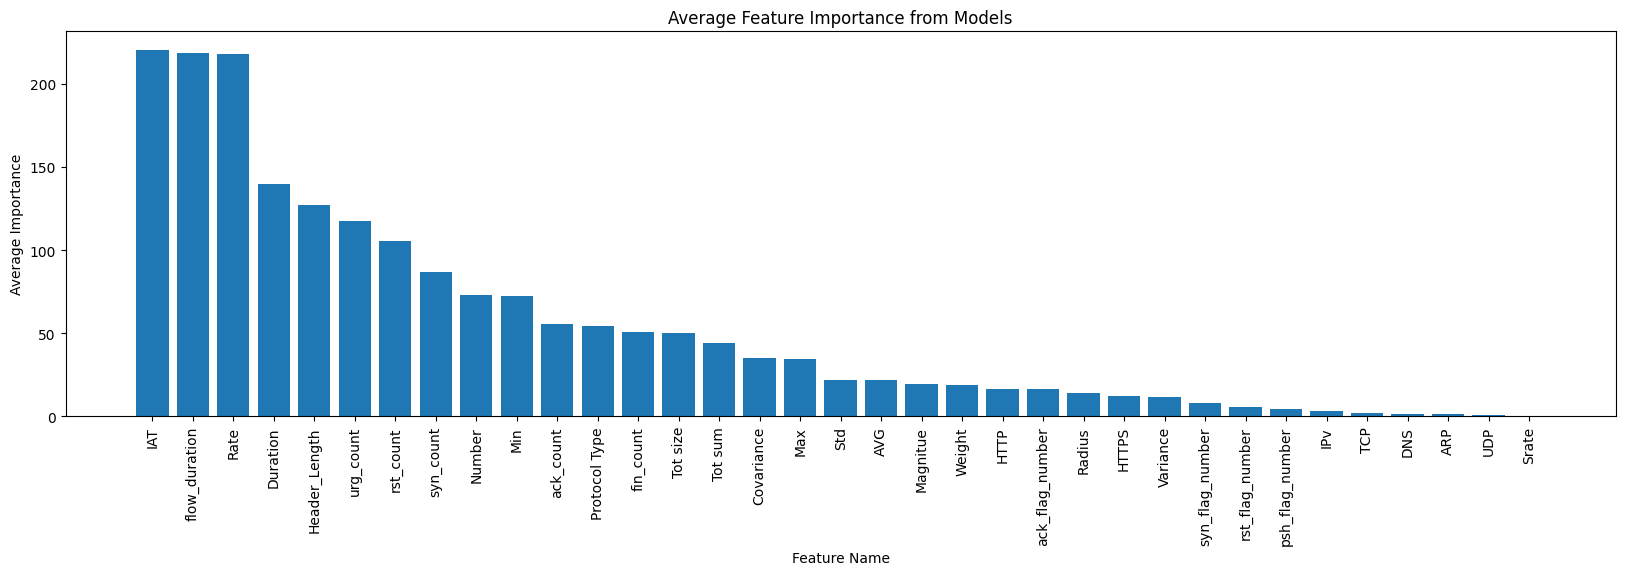

,Feature,Average Importance
39,IAT,220.574456
0,flow_duration,218.867947
4,Rate,218.323853
3,Duration,139.551336
1,Header_Length,126.951900
17,urg_count,117.668089
18,rst_count,105.527511
15,syn_count,86.939819
40,Number,73.151001
34,Min,72.360075


In [10]:
# Import encoder and get all features
encoder = get_encoder(model_path_all_classes, "Please, build models first")

simpleModelsDef = model_dict_refactor_with_load_model(simpleModelsDef, model_path_all_classes)

# Get feature importance
average_importance_df = calculate_and_plot_feature_importance(simpleModelsDef, train_sets, X_columns, z_column, X_columns, file_path, fitted_models=True, filter_bool=False, scaler=scaler, encoder=encoder)
average_importance_df.to_csv('.\\resultats\\Recon\\All_classes\\feature_importance.csv', index=False)
average_importance_df.head(average_importance_df.size)

### Display performance

In [25]:
# Preprocessing if necessary
performance = read_csv_file(performance_path, model_path_all_classes)
performance = performance.drop(4).reset_index(drop=True)
# performance.insert(0, 'Model', [d['Name'] for d in simpleModelsDef])

performance.head()
# performance.to_csv(model_path_all_classes + performance_path, index=False)

In [26]:
read_csv_file(performance_path, model_path_all_classes).sort_values(by=['Total rows', 'Accuracy Testing', 'Recall Testing', 'Precision Testing', 'F1 Testing'], ascending=False).head(20)

,Model,Accuracy Training,Recall Training,Precision Training,F1 Training,Accuracy Testing,Recall Testing,Precision Testing,F1 Testing,FU_rate,FL_rate,FU,FL,Total rows
0,XGB,0.934831,0.939892,0.951827,0.945679,0.894860,0.838811,0.907238,0.865206,0.047877,0.057263,3520,4210,73521
5,LIGHT,0.920457,0.938931,0.941061,0.939947,0.892575,0.824752,0.885233,0.848124,0.048830,0.058596,3590,4308,73521
4,Cat,0.918952,0.870929,0.938070,0.897736,0.891990,0.828626,0.906974,0.857358,0.048122,0.059888,3538,4403,73521
2,RF,0.992818,0.993519,0.994348,0.993932,0.880946,0.745639,0.895455,0.768296,0.045701,0.073353,3360,5393,73521
6,GBoost,0.870552,0.838357,0.899661,0.863430,0.863848,0.814008,0.875276,0.838325,0.058772,0.077379,4321,5689,73521
1,DT,0.995183,0.995172,0.996322,0.995744,0.850723,0.808858,0.794835,0.801374,0.076332,0.072945,5612,5363,73521
3,ET,0.997790,0.997405,0.998282,0.997842,0.845650,0.718191,0.859172,0.741265,0.052393,0.101957,3852,7496,73521
8,MLP,0.748843,0.623502,0.734588,0.632432,0.739068,0.612411,0.668986,0.616406,0.112485,0.148447,8270,10914,73521
7,Adaboost,0.691761,0.644241,0.795190,0.680822,0.654752,0.640000,0.763038,0.660477,0.105888,0.239360,7785,17598,73521


## Final Prediction

In [11]:
# Define model and import encoder
model = joblib.load(model_path_all_classes + 'model_XGB.joblib')
encoder = get_encoder(model_path_all_classes, "Please, build binary model(s) first")

# Get binary col to include it into the new df
pred_column = 'Prediction'
binary_col = get_col_in_csv(after_build_csv, model_repo, z_column, pred_column, filter_name, filter=True, verbose=True)

# Get prediction
new_after_build_set, y_test, y_pred, z_test = get_prediction_by_model_s(model, [after_build_csv], model_repo, X_columns, y_column=y_column, z_column=pred_column, filter_bool=True, filter_name=filter_name, scale=True, encode=False, scaler=scaler, encoder=encoder)

# Build new dataframe and save it
new_after_build_set[y_column] = y_test
new_after_build_set['Final Prediction'] = encoder.inverse_transform(y_pred)
new_after_build_set[z_column] = binary_col
new_after_build_set['Prediction'] = z_test
count = len(new_after_build_set[new_after_build_set[y_column] != new_after_build_set['Final Prediction']])
y_pred = encoder.inverse_transform(y_pred)

# Get performance
res = pd.DataFrame([[accuracy_score(y_test, y_pred), recall_score(y_test, y_pred, average='weighted'), precision_score(y_test, y_pred, average='weighted'), f1_score(y_test, y_pred, average='weighted'), count, count / len(new_after_build_set),len(new_after_build_set)]], columns=['Accuracy', 'Recall', 'Precision', 'F1', 'Mispredicted count', 'Mispredicted rate', 'Total rows']).head()

res.head()

Dataframe length: 302491.
After reduction dataframe length: 68920.


100%|██████████| 1/1 [00:00<00:00,  1.05it/s]


,Accuracy,Recall,Precision,F1,Mispredicted count,Mispredicted rate,Total rows
0,0.88372,0.88372,0.847486,0.864784,8014,0.11628,68920


In [12]:
labelBenignTraffic = new_after_build_set[
    (new_after_build_set['label'] == 'BenignTraffic') &
    (new_after_build_set['Final Prediction'] != 'BenignTraffic')
]
FinalBenighTraffic = new_after_build_set[
    (new_after_build_set['label'] != 'BenignTraffic') &
    (new_after_build_set['Final Prediction'] == 'BenignTraffic')
]
GoodBenignTraffic = new_after_build_set[
    (new_after_build_set['label'] == 'BenignTraffic') &
    (new_after_build_set['Final Prediction'] == 'BenignTraffic')
]

del new_after_build_set

In [13]:
print(len(labelBenignTraffic), len(FinalBenighTraffic), len(GoodBenignTraffic))

2896 0 0
